# Необходимые импорты

In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация, Loss Function и сигмоида

In [2]:
def plot_data(X, y):
    
    pos = y == 1
    neg = y == 0

    plt.scatter(X[pos, 0], X[pos, 1], marker='+',label='Исправен',facecolors='green')
    plt.scatter(X[neg, 0], X[neg, 1], marker='o', label='Неисправен',facecolors='red')

    plt.legend()


def plot_decision_boundary(theta, X, y):
    
    x_vals = np.array([min(X[:, 1]) - 20, max(X[:, 1]) + 20])
    y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]

    plot_data(X, y)
    
    plt.plot(x_vals, y_vals, 'b-', label='Граница решения')
    plt.legend()


def loss(theta, X, y):
    
    m = len(y)
    h = sigmoid(X @ theta)
    J = (-1 / m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    grad = (1 / m) * (X.T @ (h - y))
    
    return J, grad


sigmoid = lambda z: 1 / (1 + np.exp(-z))
predict = lambda X, theta: sigmoid(X @ theta) >= 0.5

# Загрузка и инициализация данных

In [3]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

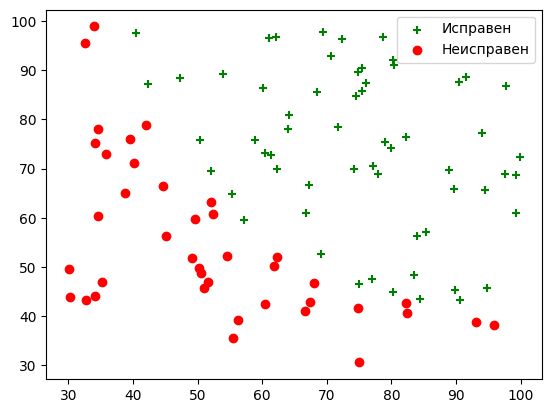

In [4]:
plot_data(X, y)

# Оптимизация

In [5]:
initial_theta = [0, 0, 0]

X = np.column_stack([X, np.ones(X.shape[0])])

J, _ = loss(initial_theta, X, y) # оценка начального loss-а модели
print(f'Начальная стоимость: {J:.4f}')

res = sc.optimize.minimize(loss, initial_theta, args=(X, y), method='TNC', jac=True)
theta = res.x
print(f'Линейная модель: оптимизированные параметры: {theta}')

# Оценка конечной стоимости после оптимизации
J_final, _ = loss(theta, X, y)
print(f'Конечная стоимость: {J_final:.4f}')

Начальная стоимость: 0.6931
Линейная модель: оптимизированные параметры: [  0.20623159   0.20147149 -25.1613188 ]
Конечная стоимость: 0.2035


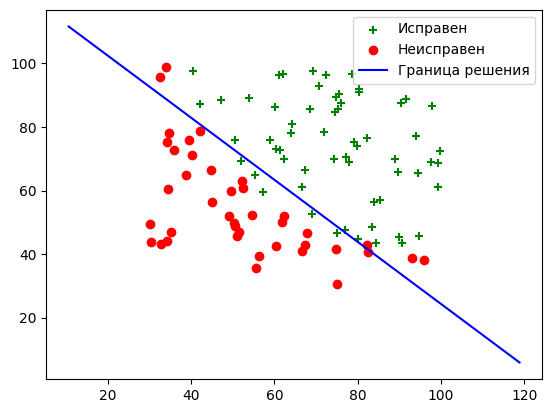

In [6]:
plot_decision_boundary(theta[::-1], X, y)

In [7]:
print('Accuracy: ', sum(predict(X, theta) == y) / y.shape[0])

Accuracy:  0.89


# Сохранение параметров

In [8]:
np.savetxt('theta.txt', theta)

# Добавление нелинейного признака

In [9]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

In [10]:
initial_theta = [0, 0, 0, 0]

X = np.column_stack([X, np.log((X[:, :1] + X[:, 1:2]))])
X = np.column_stack([X, np.ones(X.shape[0])])

J, _ = loss(initial_theta, X, y) # оценка начального loss-а модели
print(f'Начальная стоимость: {J:.4f}')

res = sc.optimize.minimize(loss, initial_theta, args=(X, y), method='TNC', jac=True)
theta_m = res.x
print(f'Линейная модель: оптимизированные параметры: {theta_m}')

# Оценка конечной стоимости после оптимизации
J_final, _ = loss(theta_m, X, y)
print(f'Конечная стоимость: {J_final:.4f}')

Начальная стоимость: 0.6931
Линейная модель: оптимизированные параметры: [ 0.24454062  0.23972195 -4.74722352 -7.03646523]
Конечная стоимость: 0.2039


In [11]:
print('Accuracy: ', sum(predict(X, theta_m) == y) / y.shape[0])

Accuracy:  0.9


In [12]:
np.savetxt('theta_m.txt', theta)

# Обученная система

In [13]:
theta = np.loadtxt('theta.txt')
theta_m = np.loadtxt('theta_m.txt')

while True:
	
	try:
		
		x1 = float(input('Введите неравномерность: '))
		x2 = float(input('Введите уровень шума: '))
        
		# Для линейной модели добавляем столбец единиц
		x_linear = np.array([1, x1, x2])
		ans_linear = predict(theta, x_linear)

		# Для нелинейной модели добавляем признаки второго порядка
		x_m = np.array([x1, x2, np.log(x1 + x2)])
		ans_m = predict(theta_m, x_m)

		# Вывод результатов
		print(f'Для линейной модели:', int(ans_linear))

		print(f'Для линейной модели с нелинейным признаком:', int(ans_m))

	except ValueError:
		print('Некорректный ввод. Завершение работы.')
		break

Введите неравномерность:  34
Введите уровень шума:  78


Для линейной модели: 0
Для линейной модели с нелинейным признаком: 0


Введите неравномерность:  quit


Некорректный ввод. Завершение работы.
